In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

import pandas
import numpy as np
import pandas as pd
import re
from rdkit.Chem import Draw
from rdkit.Chem import DataStructs

from utils import save_dataset, get_parameters
from rdkit_utils import smiles_dataset

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import matplotlib.pyplot as plt
from PIL import Image

from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

Colour Coded tSNE

Current path is: C:\Users\hewan\Downloads\ml-lsd1\figures
Path already existed.


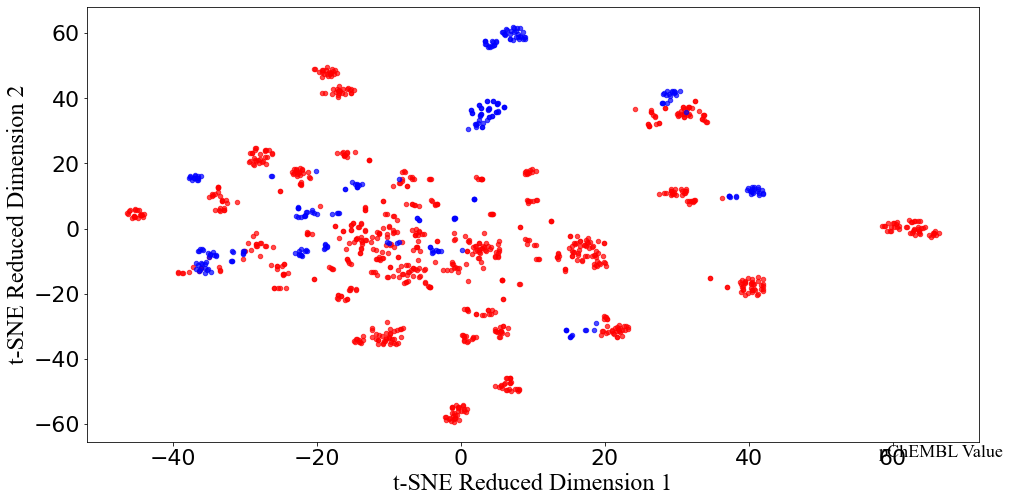

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.manifold import TSNE


np.random.seed(42)

path = os.path.join(os.getcwd(), 'figures')
print('Current path is:', path)

if os.path.exists(path) == True:
    pass
    print('Path already existed.')
else:
    os.mkdir(path)
    print('Path created.')
dataset = pd.read_csv('./datasets/compiled dataset.csv')

x_values = pd.read_csv('./datasets/3_512_x_main3.csv').values
y_values = pd.read_csv('./datasets/3_512_y_main3.csv').values.ravel()
tsne_descriptors = TSNE(n_components=2, random_state = 42)
x_tsne = tsne_descriptors.fit_transform(x_values)

# manually added new/old labels on ./datasets/3_512_y_main3.csv
tsne_df=pd.DataFrame(np.transpose(np.array([x_tsne[:, 0], x_tsne[:, 1]])), columns=["T1", "T2"])
tsne_df["old/new"]= dataset["old/new"]
tsne_df["SMILES"]= dataset["SMILES"]

tsne_df_old = tsne_df[tsne_df["old/new"] =="old"]
tsne_df_new = tsne_df[tsne_df["old/new"] =="new"]

# draw tsne
cm = plt.cm.get_cmap('RdYlBu')
plt.figure(figsize=(16, 8))
plt.xticks(size = 22)
plt.yticks(size = 22)
plt.xlabel('t-SNE Reduced Dimension 1',fontproperties = 'Times New Roman', size = 24)
plt.ylabel('t-SNE Reduced Dimension 2',fontproperties = 'Times New Roman', size = 24)
plt.scatter(tsne_df_old["T1"], tsne_df_old["T2"],color="red", alpha= 0.7, vmin= 3, vmax= 9, s= 20)
plt.scatter(tsne_df_new["T1"], tsne_df_new["T2"],color="blue", alpha= 0.7, vmin= 3, vmax= 9, s= 20)

plt.text(58, -70, "pChEMBL Value", fontproperties = 'Times New Roman', size = 18)
plt.savefig("figures/TSNE3.png", bbox_inches='tight', pad_inches= 0)

tsne_image = Image.open('figures/TSNE3.png')
tsne_image.show()

Conversion of tSNE to a df

In [7]:
print(tsne_df)

             T1         T2 old/new  \
0     -4.067519   8.623734     old   
1     31.713966  35.163174     old   
2     30.062586  35.338902     old   
3     -9.397382   3.946444     old   
4    -13.233212  -3.531994     old   
...         ...        ...     ...   
1202  29.576920  42.236759     new   
1203  28.674273  42.121368     new   
1204  30.456985  42.285816     new   
1205  29.793129  41.812630     new   
1206  29.898232  41.115299     new   

                                                 SMILES  
0     Cl.N=C(NCCCNCCCCCCCNCCCNC(=N)NC(=N)NCCC(c1cccc...  
1     CC(C)C[C@H](NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](C...  
2     C#CCNCCCC[C@H](NC(=O)[C@@H](NC(=O)[C@H](CCCNC(...  
3                                          NNCCc1ccccc1  
4                               N[C@@H]1C[C@H]1c1ccccc1  
...                                                 ...  
1202  NC([C@@]([H])(NC([C@@H](NC([C@@H](NC([C@@H](NC...  
1203  NC([C@@]([H])(NC([C@@H](NC([C@@H](NC([C@@H](NC...  
1204  NC([C@@H](C)NC(

In [3]:
#Conversion of the tsne map into a df, then .csv allowed for clusters' T1 and T2 ranges to be searched for characterisation. These ranges were identified visually from the tsne map

In [15]:
tsne_df
df.to_csv('./datasets/tsne_dataset.csv')

cluster 1

In [12]:
df = tsne_df

In [18]:
df_filtered = df.loc[df['T2'] > 50]
df_filtered = df_filtered.to_csv('./datasets/cluster 1.csv')

cluster 2

In [8]:
df_filtered_2 = df.loc[(df['T1'] >= 0) & (df['T1']<= 10) & (df['T2'] >= 20) & (df['T2']<= 40)]
df_filtered_2 = df_filtered_2.to_csv('./datasets/cluster 2.csv')

cluster 3

In [10]:
df_filtered_3 = df.loc[(df['T1'] >= 39) & (df['T1']<= 50) & (df['T2'] >= 0) & (df['T2']<= 20)]
df_filtered_3 = df_filtered_3.to_csv('./datasets/cluster 3.csv')